In [80]:
import pandas as pd
A = pd.read_csv("/users/sai/Desktop/dataset/digitsnpixels.csv")

In [81]:
A.head(3)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
A.shape


(14464, 785)

# Visualize 1 image by converting into 28*28


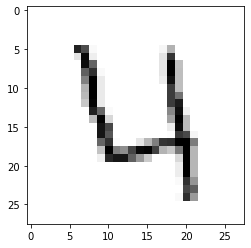

In [84]:
import matplotlib.pyplot as plt
X = A.drop("label",axis=1).values
plt.imshow(X[3:4].reshape(28,28),cmap=plt.cm.binary)

In [85]:
X[3:4]


array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 220., 179., 

# Define X and Y in array format


# Convert Y into cactegorical data(OHE)


In [86]:
Y = A.label.values


In [87]:
#X_scaled[2]


In [88]:
Y_cat = pd.get_dummies(Y).values


In [89]:
import tensorflow as tf
#tf.keras.utils.to_categorical(Y)

# Scale X


In [90]:
X_scaled = X/255


In [91]:

X_scaled


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., nan, nan, nan]])

In [92]:
Y_cat


array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [93]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_scaled,Y_cat,test_size=0.2,random_state=21)

In [94]:
xtrain.shape



(11571, 784)

In [95]:
xtest.shape


(2893, 784)

In [96]:
xtrain = xtrain.reshape(11571,28,28,1)
xtest = xtest.reshape(2893,28,28,1)

In [97]:
xtrain.shape


(11571, 28, 28, 1)

In [98]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,BatchNormalization,Flatten

In [99]:
nn = Sequential()

nn.add(Convolution2D(filters = 16,kernel_size = (3,3),activation="relu",input_shape=(28, 28, 1)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))
nn.add(Flatten())

nn.add(Dense(120,activation="relu"))
nn.add(Dense(10,activation="softmax"))

In [100]:
nn.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])


In [101]:
nn.fit(xtrain,ytrain,epochs=3,batch_size=64)


Epoch 1/3
181/181 [==============================] - 6s 28ms/step - loss: nan - accuracy: 0.3876
Epoch 2/3
181/181 [==============================] - 5s 27ms/step - loss: nan - accuracy: 0.0961
Epoch 3/3
181/181 [==============================] - 5s 27ms/step - loss: nan - accuracy: 0.0961


In [102]:
pred_prob = nn.predict(xtest)


In [103]:
from numpy import argmax
pred = argmax(pred_prob,axis=1)

In [104]:
ytest = argmax(ytest,axis=1)


In [105]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.10093328724507432